# Elastic‑Corridor Residual Explorer  
*Generated 2025-07-12*  

This notebook automates **nested Fibonacci slicing** and visualises how the residual
`delta` behaves—whether it shrinks toward zero or settles into a narrow **elastic band**.  

### What it does  
1. Lets you pick the power‐of‐3 scaling `3**p`.  
2. Runs a *greedy* search for up to `DEPTH` inner slices.  
3. Records the residual after each slice.  
4. Plots all residuals and, optionally, red band lines `[BAND_LOW, BAND_HIGH]`.  


In [1]:
import math, pandas as pd, numpy as np, matplotlib.pyplot as plt

alpha_inv = 137.035999084   # CODATA‑2022
T = 1e-4 * alpha_inv

def fib(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a


In [2]:
# ===== USER SETTINGS =====
P_EXPONENT = 3        # power of 3 in the denominator (3 -> 1/27)
N_START    = 55       # starting n for the outermost slice
DEPTH      = 10       # how many nested slices to compute
BAND_LOW   = 0.01366  # set to None to disable band lines
BAND_HIGH  = 0.01371
# =========================


Level 0: n=55, G_0=0.0000000000, delta=0.0137035999
Level 1: m= 4, slice=0.0123456790, delta=0.0013579209
Level 2: m= 9, slice=0.0010893246, delta=0.0002685963
Level 3: m=12, slice=0.0002572016, delta=0.0000113946
Level 4: m=19, slice=0.0000088584, delta=0.0000025362
Level 5: m=22, slice=0.0000020912, delta=0.0000004450
Level 6: m=25, slice=0.0000004937, delta=-0.0000000486
Level 7: m=99, slice=0.0000000000, delta=-0.0000000486
Level 8: m=99, slice=0.0000000000, delta=-0.0000000486
Level 9: m=99, slice=0.0000000000, delta=-0.0000000486
Level 10: m=99, slice=0.0000000000, delta=-0.0000000486


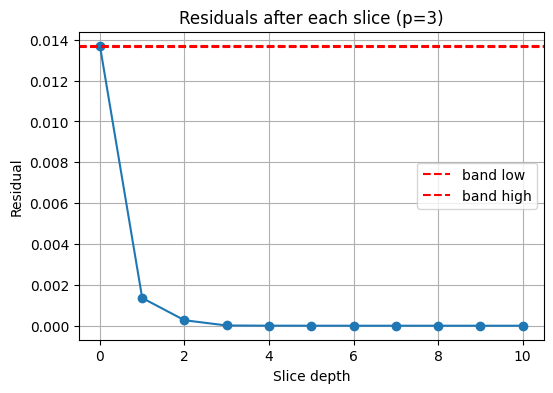

Greedy m-sequence: [4, 9, 12, 19, 22, 25, 99, 99, 99, 99]


In [3]:

denom = 3**P_EXPONENT
residuals = []
m_sequence = []

# outermost slice
G0 = 1/(denom * fib(N_START))
delta = T - G0
residuals.append(delta)
print(f"Level 0: n={N_START}, G_0={G0:.10f}, delta={delta:.10f}")

current = delta
for depth in range(1, DEPTH+1):
    # greedy: pick m that minimises |candidate - current|
    best = min((abs(1/(denom*fib(m))-current), m) for m in range(1, 100))[1]
    m_sequence.append(best)
    slice_val = 1/(denom * fib(best))
    current -= slice_val
    residuals.append(current)
    print(f"Level {depth}: m={best:2d}, slice={slice_val:.10f}, delta={current:.10f}")

# ---- plot ----
plt.figure(figsize=(6,4))
plt.plot(range(len(residuals)), residuals, marker='o')
plt.title(f'Residuals after each slice (p={P_EXPONENT})')
plt.xlabel('Slice depth')
plt.ylabel('Residual')
if BAND_LOW is not None and BAND_HIGH is not None:
    plt.axhline(BAND_LOW, color='r', linestyle='--', label='band low')
    plt.axhline(BAND_HIGH, color='r', linestyle='--', label='band high')
    plt.legend()
plt.grid(True)
plt.show()

print("Greedy m-sequence:", m_sequence)
